# Exploratory Data Analysis

When placed in Metapack data package, this notebook will load the package and run a variety of common EDA operations on the first resource. 


In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np

%matplotlib inline
sns.set_context('notebook')


In [2]:
pkg = mp.jupyter.open_package()
pkg

In [3]:
first_resource = next(iter(pkg.resources())).name
first_resource

'beachwatch-sd'

In [4]:

pkg.resource(first_resource)


Header,Type,Description
program,string,
parentproject,string,
project,string,
stationname,string,
stationcode,string,
sampledate,date,
collectiontime,time,
locationcode,string,
collectiondepth,integer,
unitcollectiondepth,string,


In [5]:
df = pkg.resource('beachwatch-sd').read_csv(parse_dates=True)

In [6]:
df.head()

,program,parentproject,project,stationname,stationcode,sampledate,collectiontime,locationcode,collectiondepth,unitcollectiondepth,...,regional_board,rb_number,huc8,huc8_number,huc10,huc10_number,huc12,huc12_number,waterbody_type,sampleid
0,BeachWatch,BeachWatch_San Diego County,BeachWatch_San Diego County,"EH-010-Imperial Beach municipal beach, other, ...",EH-010,1999-04-02,2018-07-27,SurfZone,-88,NR,...,San Diego,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Recorded
1,BeachWatch,BeachWatch_San Diego County,BeachWatch_San Diego County,"EH-010-Imperial Beach municipal beach, other, ...",EH-010,1999-04-29,2018-07-27,SurfZone,-88,NR,...,San Diego,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Recorded
2,BeachWatch,BeachWatch_San Diego County,BeachWatch_San Diego County,"EH-010-Imperial Beach municipal beach, other, ...",EH-010,1999-04-30,2018-07-27,SurfZone,-88,NR,...,San Diego,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Recorded
3,BeachWatch,BeachWatch_San Diego County,BeachWatch_San Diego County,"EH-010-Imperial Beach municipal beach, other, ...",EH-010,1999-05-26,2018-07-27,SurfZone,-88,NR,...,San Diego,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Recorded
4,BeachWatch,BeachWatch_San Diego County,BeachWatch_San Diego County,"EH-010-Imperial Beach municipal beach, other, ...",EH-010,1999-05-26,2018-07-27,SurfZone,-88,NR,...,San Diego,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Recorded


In [7]:
empty_col_names = [cn for cn in df.columns if df[cn].nunique() == 0]
const_col_names= [cn for cn in df.columns if df[cn].nunique() == 1]
ignore_cols = empty_col_names+const_col_names
dt_col_names= list(df.select_dtypes(include=[np.datetime64]).columns)

number_col_names = [ cn for cn in df.select_dtypes(include=[np.number]).columns if cn not in ignore_cols ]
other_col_names = [cn for cn in df.columns if cn not in (empty_col_names+const_col_names+dt_col_names+number_col_names) ]

# Constant Columns

In [8]:
df[const_col_names].drop_duplicates().T

,0
program,BeachWatch
parentproject,BeachWatch_San Diego County
project,BeachWatch_San Diego County
locationcode,SurfZone
collectiondepth,-88
unitcollectiondepth,NR
sampletypecode,Grab
collectionreplicate,1
resultsreplicate,1
labsampleid,Not Recorded


# Empty Columns

In [9]:
df[empty_col_names].drop_duplicates().T

,0
observation,NaN
samplecomments,NaN
collectioncomments,NaN
resultscomments,NaN
batchcomments,NaN
groupsamples,NaN
occupationmethod,NaN
startingbank,NaN
distancefrombank,NaN
unitdistancefrombank,NaN


# Date and Time Columns

In [10]:
df[dt_col_names].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202257 entries, 0 to 202256
Data columns (total 2 columns):
sampledate        202257 non-null datetime64[ns]
collectiontime    202257 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 3.1 MB


In [11]:
df[dt_col_names].describe()

,sampledate,collectiontime
count,202257,202257
unique,3836,681
top,2005-09-06 00:00:00,2018-07-27 00:00:00
freq,260,57144
first,1998-07-21 00:00:00,2018-07-27 00:00:00
last,2013-12-31 00:00:00,2018-07-27 23:52:00


# Number Columns

In [12]:
df[number_col_names].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202257 entries, 0 to 202256
Data columns (total 3 columns):
result             198271 non-null float64
targetlatitude     202257 non-null float64
targetlongitude    202257 non-null float64
dtypes: float64(3)
memory usage: 4.6 MB


In [13]:
df[number_col_names].describe()

,result,targetlatitude,targetlongitude
count,1.982710e+05,202257.000000,202257.000000
mean,2.269960e+04,32.864222,-117.256097
std,5.731476e+05,0.206458,0.081393
min,-1.000000e+01,32.534401,-117.595001
25%,4.000000e+00,32.714802,-117.288002
50%,2.000000e+01,32.794300,-117.255997
75%,3.000000e+01,33.026001,-117.209999
max,2.800000e+07,33.386002,-117.063004


In [14]:
def plot_histograms(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    plt.figure(figsize=(2*n_cols,5*n_rows))

    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            sns.distplot(df[col_names[i]].fillna(0),kde=True) 
        except:
            pass


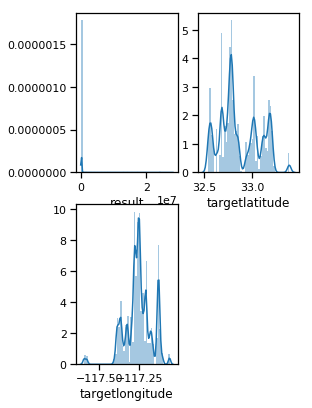

In [15]:
plot_histograms(df[number_col_names])

# Other Columns

In [16]:
df[other_col_names].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202257 entries, 0 to 202256
Data columns (total 11 columns):
stationname         202257 non-null object
stationcode         202257 non-null object
labbatch            202257 non-null object
methodname          202257 non-null object
analyte             202257 non-null object
unit                202257 non-null object
resultqualcode      201920 non-null object
qacode              202257 non-null object
sampleagency        202257 non-null object
labagency           202257 non-null object
submittingagency    202257 non-null object
dtypes: object(11)
memory usage: 17.0+ MB


In [17]:
df[other_col_names].describe().T

,count,unique,top,freq
stationname,202257,172,"IB-080-Coronado City beaches, San Diego",5065
stationcode,202257,172,IB-080,5065
labbatch,202257,9013,SD-11/2/2004,131
methodname,202257,8,SM 9222 B,49791
analyte,202257,4,"Coliform, Total",66992
unit,202257,2,MPN/100 mL,143346
resultqualcode,201920,6,=,107776
qacode,202257,2,NR,174811
sampleagency,202257,11,SDCDEH,84275
labagency,202257,11,SDCDEH,84275
